# Лабораторная работа №3. 
## Митрофанов Антон, группа м4121


Возможный план, близкий к изложенному в третьей лекции. Любыми известными способами осуществить построение импульсной и переходной характеристик, амплитудно-частотной и фазочастотной характеристик КИХ- и БИХ-фильтров первого порядка. 

Проанализировать изменение основных характеристик фильтров при изменении их параметров. Осуществить обработку типовых последовательностей (единичный импульс, единичный скачок, синусоидальное колебание) анализируемыми фильтрами. Сделать соответствующие выводы по полученным результатам.


----------------------------------------------
## Теория
**Импульсной характеристикой** системы называется её реакция на единичный импульс при нулевых начальных условиях. <br>
**Переходной характеристикой** системы называется её реакция на воздействие в форме единичной функции. 

### КИХ-фильтры
Определение с [вики](https://ru.wikipedia.org/wiki/%D0%A4%D0%B8%D0%BB%D1%8C%D1%82%D1%80_%D1%81_%D0%BA%D0%BE%D0%BD%D0%B5%D1%87%D0%BD%D0%BE%D0%B9_%D0%B8%D0%BC%D0%BF%D1%83%D0%BB%D1%8C%D1%81%D0%BD%D0%BE%D0%B9_%D1%85%D0%B0%D1%80%D0%B0%D0%BA%D1%82%D0%B5%D1%80%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%BE%D0%B9) :
> Фильтр с конечной импульсной характеристикой (Нерекурсивный фильтр, КИХ-фильтр) или FIR-фильтр (FIR сокр. от finite impulse response — конечная импульсная характеристика) — один из видов линейных цифровых фильтров, характерной особенностью которого является ограниченность по времени его импульсной характеристики (с какого-то момента времени она становится точно равной нулю). Такой фильтр называют ещё нерекурсивным из-за отсутствия обратной связи. Знаменатель передаточной функции такого фильтра — константа.

![resources/fir.png](resources/fir.png)


### БИХ-фильтры
Определение с [вики](https://ru.wikipedia.org/wiki/%D0%A4%D0%B8%D0%BB%D1%8C%D1%82%D1%80_%D1%81_%D0%B1%D0%B5%D1%81%D0%BA%D0%BE%D0%BD%D0%B5%D1%87%D0%BD%D0%BE%D0%B9_%D0%B8%D0%BC%D0%BF%D1%83%D0%BB%D1%8C%D1%81%D0%BD%D0%BE%D0%B9_%D1%85%D0%B0%D1%80%D0%B0%D0%BA%D1%82%D0%B5%D1%80%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%BE%D0%B9) :
> Фильтр с бесконечной импульсной характеристикой (Рекурсивный фильтр, БИХ-фильтр) или IIR-фильтр (IIR сокр. от infinite impulse response — бесконечная импульсная характеристика) — линейный электронный фильтр, использующий один или более своих выходов в качестве входа, то есть образующий обратную связь. Основным свойством таких фильтров является то, что их импульсная переходная характеристика имеет бесконечную длину во временной области, а передаточная функция имеет дробно-рациональный вид. Такие фильтры могут быть как аналоговыми, так и цифровыми.

![resources/iir.png](resources/iir.png)

----------------------------

In [160]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.fft
import librosa
import IPython.display as ipd
import librosa.display

np.seterr(divide='ignore', invalid='ignore') # Чтобы не ругался на деление на 0
%matplotlib inline

In [161]:
# from Lab2
def get_amplitude_from_spec(spec):
    # YOUR CODE HERE
    
    #
    raise NotImplementedError()

#Реализовать функцию построения фазового спекта
def get_phi_from_spec(spec):
    # YOUR CODE HERE
    
    #
    raise NotImplementedError()
    # TODO чекать деление на 0

# Функция отрисовки аудио сигнала. 
def draw_waveform(wav, sr, figsize=(14, 5)):
    # Отрисовка звукового сигнала во временной области
    plt.figure(figsize=figsize)
    librosa.display.waveplot(wav, sr=sr)
    plt.show()

# Функция отрисовки спектра
def draw_spec(spec, name=None, draw_A=True, draw_p=True, figsize=(14, 3)):
    if len(spec)<100:
        # Рисуем точки как "леденцы на палочках"
        draw_func = plt.stem
    else:
        # При большом N "леденцы" выглядит плохо, 
        # Поэтому будем рисовать огибающую
        draw_func = plt.plot
    
    if draw_A:
        plt.figure(figsize=figsize)
        plt.title("Amplitude spectrum")
        spec_A = get_amplitude_from_spec(spec)
        draw_func(spec_A)
        plt.ylabel("magnitude")
        plt.xlabel("n")
        if name is not None:
            plt.legend([name])
        plt.show()
        
    if draw_p:
        plt.figure(figsize=figsize)
        plt.title("Phase spectrum")
        phi = get_phi_from_spec(spec)
        draw_func(phi)
        plt.ylabel("Radian")
        plt.xlabel("n")
        if name is not None:
            plt.legend([name])
        plt.show()
    return 


In [10]:
# Определяем фильтры
def FIR_filter(x, alpha_prev=0.5, alpha_curr=0.5):
    # alpha_prev - weight for previous frame
    # alpha_curr - weight for current frame
    
    # YOU CODE HERE
   
    #
    raise NotImplementedError()

def IIR_filter(x, alpha=0.5):
    # alpha - weight for reccurent connection
    
    # YOU CODE HERE
    
    #
    raise NotImplementedError()


In [29]:
def test_filters():
    x = np.ones(10)
    y = FIR_filter(x)
    assert y[0] == 0.5 and (y[1:] == 1).all(), \
        RuntimeError(f"bad FIR. x={x}. y={y}")
    y = FIR_filter(x, alpha_prev=0.1, alpha_curr=0.9)
    assert y[0] == 0.9 and (y[1:] == 1).all(), \
        RuntimeError(f"bad FIR(alphas 0.1 and 0.9). x={x}. y={y}")
    y = IIR_filter(x)
    assert y[0]==1 and (y[3:].round() == 2).all() and (y<2).all(), \
        RuntimeError(f"Bad IIR. x={x}. y={y}")
    y = IIR_filter(x, 0.2)
    assert y[0]==1 and (y[3:].round(2) ==1.25).all() and (y<1.25).all(), \
        RuntimeError(f"Bad IIR(alpha={0.2}. x={x}. y={y}")
    print("All Ok!")

test_filters()

All Ok!


## Импульсная и переходная характеристики


Импульсная характеристика фильтров с aplha=0.5:


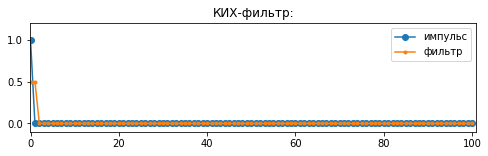

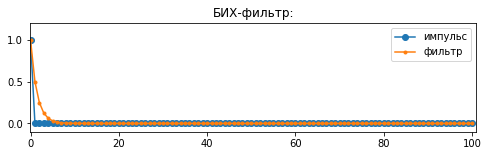

In [146]:
print("Импульсная характеристика фильтров с aplha=0.5:")

# Получите импульсную характеристику FIR_filter и IIR_filter
# YOUR CODE HERE
#
impulse = 
fir_impulse_response =
iir_impulse_response =
#

plt.figure(figsize=(8,2))
plt.title("КИХ-фильтр:")
plt.plot(impulse, 'o-')
plt.plot(fir_impulse_response, '.-')
plt.legend(['импульс', 'фильтр'])
plt.axis([-0.1, len(impulse), -0.1, 1.2])
plt.show()

plt.figure(figsize=(8,2))
plt.title("БИХ-фильтр:")
plt.plot(impulse, 'o-')
plt.plot(iir_impulse_response, '.-')
plt.legend(['импульс', 'фильтр'])
plt.axis([-0.1, len(impulse), -0.1, 1.2])
plt.show()

In [142]:
assert (fir_impulse_response[0:2] == 0.5).all() and \
        (fir_impulse_response[2:] == 0).all(), "Bad FIR."
assert iir_impulse_response.sum().round() == 2 and \
        iir_impulse_response.sum()<2 and \
        (iir_impulse_response != 0).all(), "Bad IIR."
assert iir_impulse_response[1:].sum().round() == 1 and \
        iir_impulse_response[1:].sum()<1 and \
        iir_impulse_response[2:].sum() < 0.5, "Bad IIR."
print("All ok!")

All ok!


Переходная характеристика фильтров с alpha=0.5:


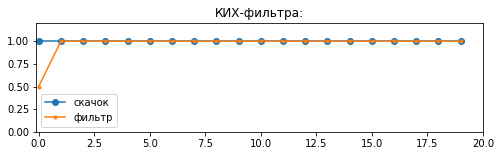

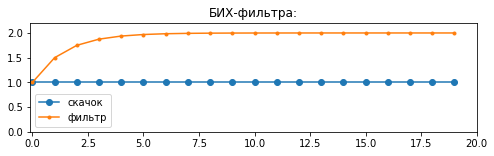

In [124]:
print("Переходная характеристика фильтров с alpha=0.5:")
# Получите переходную зарактеристику фильтров
# YOUR CODE HERE
#
step = 
fir_step_response =
iir_step_response =
#

plt.figure(figsize=(8,2))
plt.title("КИХ-фильтра:")
plt.plot(step, 'o-')
plt.plot(fir_step_response, '.-')
plt.axis([-0.1, len(step), 0, 1.2])
plt.legend(['скачок', 'фильтр'])

plt.show()

plt.figure(figsize=(8,2))
plt.title("БИХ-фильтра:")
plt.plot(step, 'o-')
plt.plot(iir_step_response, '.-')
plt.axis([-0.1, len(step), 0, 2.2])
plt.legend(['скачок', 'фильтр'])
plt.show()

In [122]:
assert fir_step_response[0] == 0.5 and \
        (fir_step_response[1:] == 1).all(), "Bad FIR."
assert iir_step_response[0] == 1 and iir_step_response[1] == 1.5 and iir_step_response[2] == 1.75 and \
        iir_step_response.mean().round() == 2 and (iir_step_response < 2).all(), "Bad IIR."
print("All ok!")

All ok!


## амплитудно-частотная и фазочастотная характеристик

амплитудно-частотная характеристика фильтров с alpha=0.5


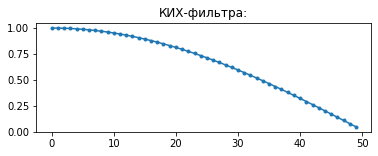

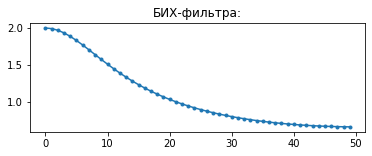

In [149]:
print("амплитудно-частотная характеристика фильтров с alpha=0.5")

# Получить амплитудно-частотную характеристику
# YOUR CODE HERE
#
fir_frequency_response = 
iir_frequency_response = 
#


plt.figure(figsize=(6,2))
plt.title("КИХ-фильтра:")
plt.plot(fir_frequency_response, '.-')
plt.show()


plt.figure(figsize=(6,2))
plt.title("БИХ-фильтра:")
plt.plot(iir_frequency_response, '.-')
plt.show()

In [150]:
### TODO make tests

print("All ok!")

AssertionError: Bad FIR.

Фазово-частотная характеристика


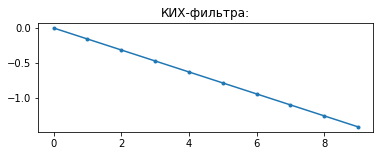

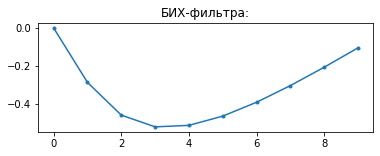

In [128]:
print("Фазово-частотная характеристика")

# Получить фазово-частотную характеристику
# YOUR CODE HERE
#
fir_phase_response = 
iir_phase_response = 
#


plt.figure(figsize=(6,2))
plt.title("КИХ-фильтра:")
plt.plot(fir_phase_response, '.-')
plt.show()

fr_iir = scipy.fft.fft(iir_imp)
plt.figure(figsize=(6,2))
plt.title("БИХ-фильтра:")
plt.plot(iir_phase_response, '.-')

plt.show()

In [ ]:
#
### TODO MAKE TESTS
##
#
print("All ok!")